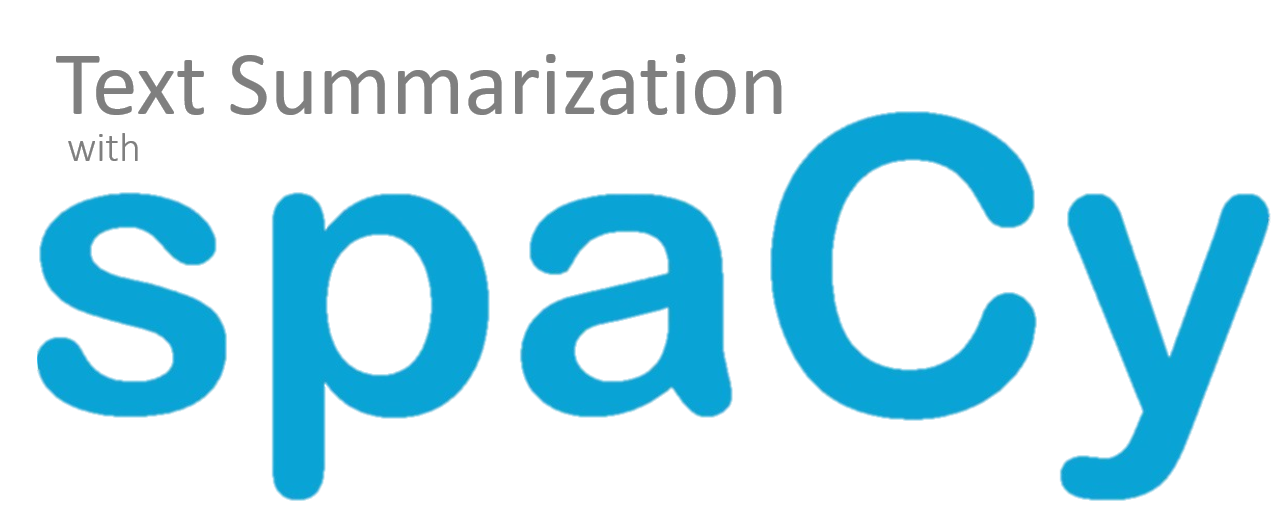

In this Project we are going to build an NLP modle that will be able to summarize a document using the Spacy Library

Text summarization can broadly be divided into two categories — Extractive Summarization and Abstractive Summarization.

Extractive Summarization: These methods rely on extracting several parts, such as phrases and sentences, from a piece of text and stack them together to create a summary. Therefore, identifying the right sentences for summarization is of utmost importance in an extractive method.

Abstractive Summarization: These methods use advanced NLP techniques to generate an entirely new summary. Some parts of this summary may not even appear in the original text.

In this notebook we will perform extractive summarization technique.

STEP 1: Installations

In [1]:
#Installing Spacy Library in the notebooks
import sys
!{sys.executable} -m pip install spacy
!{sys.executable} -m spacy download en

In [2]:
#importing spacy and other relevant modules
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from string import punctuation
from collections import Counter
from heapq import nlargest

In [3]:
#Load English into Spacy
nlp = spacy.load("en_core_web_sm")

The document that we are going to summarize is "Introduction to Machine Learning" stored in the document variable

In [ ]:
document = '''Machine learning (ML) is the scientific study of algorithms and statistical models that computer systems use to 
progressively improve their performance on a specific task. Machine learning algorithms build a mathematical model of sample
data, known as “training data”, in order to make predictions or decisions without being explicitly programmed to perform the
task. Machine learning algorithms are used in the applications of email filtering, detection of network intruders, and computer
vision, where it is infeasible to develop an algorithm of specific instructions for performing the task. Machine learning is 
closely related to computational statistics, which focuses on making predictions using computers. The study of mathematical 
optimization delivers methods, theory and application domains to the field of machine learning. Data mining is a field of study
within machine learning and focuses on exploratory data analysis through unsupervised learning. In its application across 
business problems, machine learning is also referred to as predictive analytics.'''



Passing the document string into the nlp function

In [5]:
document = nlp(document)

Finding the number of sentences in the doucument string

In [6]:
len(list(document.sents))

STEP 2: Filtering Tokens


In [7]:
keyword= []
stopwords = list(STOP_WORDS)
pos_tag = ['PROPN', 'ADJ', 'NOUN', 'VERB']
for token in document:
    if( token.text in stopwords or token.text in punctuation):
        continue
    if(token.pos_ in pos_tag):
        keyword.append(token.text) 

Calculate the frequency of each token using the “Counter” function, store it in freq_word and to view top 5 frequent words, most_common method can be used.

In [8]:
freq_word = Counter(keyword)
freq_word.most_common(10)

STEP 3: Normalization

The word frequency can be normalised for better processing and it can be done by dividing the token’s frequencies by the maximum frequency.

In [9]:
max_freq = Counter(keyword).most_common(1)[0][1]
for word in freq_word.keys():
    freq_word[word]=(freq_word[word]/max_freq)
freq_word.most_common(10)

STEP 4: Weighing Sentence

This is the major part where each sentence is weighed based on the frequency of the token present in each sentence. The result is stored as a key-value pair in sent_strength where keys are the sentences in the string doc and the values are the weight of each sentence.

In [10]:
sent_strength= {}
for sent in document.sents:
    for word in sent:
        if word.text in freq_word.keys():
            if sent in sent_strength.keys() :
                sent_strength[sent]+=freq_word[word.text]
            else:
                sent_strength[sent]=freq_word[word.text]
print(sent_strength)

STEP 5: Summarizing the String

Finally, nlargest function is used to summarize the string, it takes 3 arguments,
→ Number of data to extract
→ An Iterable (List/Tuple/Dictionary)
→ Condition to be satisfied, respectively

In [11]:
summarized_sentences = nlargest(3, sent_strength, key=sent_strength.get)
print (summarized_sentences)

CONCLUSION:
the nlargest function returns a list containing the top 3 sentences which are stored as summarized_sentences.

Each sentence in this list is of spacy.span type

In [12]:
print(type(summarized_sentences[2]))

These span types can be converted into a string with the following lines of code

In [13]:
final_sentences= [w.text for w in summarized_sentences]
summary= ''.join(final_sentences)
print(summary)
